In [ ]:
from sklearn.datasets import load_breast_cancer,load_wine

In [ ]:
df1 = load_breast_cancer()
df2 = load_wine()

In [ ]:
df1.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
df2.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
df1['data']
len(df1['feature_names'])
df1['target']
df1['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
X = df1['data']
Y = df1['target']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [ ]:
import pandas as pd
pd.DataFrame(xtrain)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.132400,0.097020,0.1801,0.05553,0.6642,0.8561,4.6030,97.85,0.004910,0.025440,0.02822,0.016230,0.01956,0.003740,28.01,28.22,184.20,2403.0,0.1228,0.35830,0.39480,0.23460,0.3589,0.09187
1,12.49,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,0.1716,0.7151,1.0470,12.69,0.004928,0.003012,0.00262,0.003390,0.01393,0.001344,13.34,19.71,84.48,544.2,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174
2,13.17,18.66,85.98,534.6,0.11580,0.12310,0.122600,0.073400,0.2128,0.06777,0.2871,0.8937,1.8970,24.25,0.006532,0.023360,0.02905,0.012150,0.01743,0.003643,15.67,27.95,102.80,759.4,0.1786,0.41660,0.50060,0.20880,0.3900,0.11790
3,11.63,29.29,74.87,415.1,0.09357,0.08574,0.071600,0.020170,0.1799,0.06166,0.3135,2.4260,2.1500,23.13,0.009861,0.024180,0.04275,0.009215,0.02475,0.002128,13.12,38.81,86.04,527.8,0.1406,0.20310,0.29230,0.06835,0.2884,0.07220
4,10.75,14.97,68.26,355.3,0.07793,0.05139,0.022510,0.007875,0.1399,0.05688,0.2525,1.2390,1.8060,17.74,0.006547,0.017810,0.02018,0.005612,0.01671,0.002360,11.95,20.72,77.79,441.2,0.1076,0.12230,0.09755,0.03413,0.2300,0.06769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,12.94,16.17,83.18,507.6,0.09879,0.08836,0.032960,0.023900,0.1735,0.06200,0.1458,0.9050,0.9975,11.36,0.002887,0.012850,0.01613,0.007308,0.01870,0.001972,13.86,23.02,89.69,580.9,0.1172,0.19580,0.18100,0.08388,0.3297,0.07834
422,14.76,14.74,94.87,668.7,0.08875,0.07780,0.046080,0.035280,0.1521,0.05912,0.3428,0.3981,2.5370,29.06,0.004732,0.015060,0.01855,0.010670,0.02163,0.002783,17.27,17.93,114.20,880.8,0.1220,0.20090,0.21510,0.12510,0.3109,0.08187
423,18.81,19.98,120.90,1102.0,0.08923,0.05884,0.080200,0.058430,0.1550,0.04996,0.3283,0.8280,2.3630,36.74,0.007571,0.011140,0.02623,0.014630,0.01930,0.001676,19.96,24.30,129.00,1236.0,0.1243,0.11600,0.22100,0.12940,0.2567,0.05737
424,12.90,15.92,83.74,512.2,0.08677,0.09509,0.048940,0.030880,0.1778,0.06235,0.2143,0.7712,1.6890,16.64,0.005324,0.015630,0.01510,0.007584,0.02104,0.001887,14.48,21.82,97.17,643.8,0.1312,0.25480,0.20900,0.10120,0.3549,0.08118


**Standardize the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

In [ ]:
scl.fit(xtrain)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
xcl = scl.transform(xtrain)

In [ ]:
#(pd.DataFrame(xtrain)[0] - pd.DataFrame(xtrain)[0].mean()) / pd.DataFrame(xtrain)[0].std()

In [ ]:
#pd.DataFrame(xcl)

**Calculate Principal Components**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
pca.fit(xcl)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca= pca.transform(xcl)

In [ ]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[13.66572622  5.65594461]
[0.4544549  0.18808892]


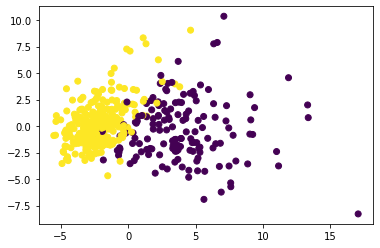

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_pca[:,0:1],x_pca[:,1:2],c=ytrain)
plt.show()

In [ ]:
x_pca

array([[ 5.68546262, -4.26988456],
       [-4.80817652, -2.39825046],
       [ 1.71234884,  2.40870421],
       [-1.23365787,  0.58205126],
       [-4.25231483, -1.0160049 ],
       [-1.10930405,  0.99044799],
       [-3.7220148 ,  4.23855661],
       [ 1.87053341, -0.28976957],
       [-1.3534407 ,  1.54030322],
       [ 3.31327391, -2.10930267],
       [ 3.15720574,  1.61590275],
       [-1.48878922, -1.74111289],
       [ 2.9459178 ,  4.02729966],
       [-1.75986688, -0.83583844],
       [-2.32072995, -0.3390549 ],
       [-4.69789317, -0.65833612],
       [ 0.0388952 ,  2.08526015],
       [-1.1524462 , -1.71027889],
       [ 5.9598613 ,  3.44858974],
       [-1.5737835 ,  1.60979535],
       [-1.95656715, -0.31043975],
       [-2.23365207, -1.05364894],
       [-1.58011093, -0.293656  ],
       [-1.55096482,  2.25391703],
       [-4.22910248, -2.04566475],
       [-2.83716367, -0.49452619],
       [ 2.88281218,  1.30655671],
       [ 5.3283047 , -1.98785799],
       [-1.39298693,

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier(n_neighbors=5)

kmodel.fit(x_pca,ytrain)

print(kmodel.score(x_pca,ytrain))

0.9530516431924883


In [ ]:
#xtest - 30 features
xtscl = scl.transform(xtest)
xtpca = pca.transform(xtscl)

In [ ]:
print(kmodel.score(xtpca,ytest))

0.9370629370629371


In [ ]:
df1['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
df1['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
u_v = df1['data'][7]
uscl = scl.transform([u_v])
upca = pca.transform(uscl)
kmodel.predict(upca)

array([0])

**Wine Data Set**

In [ ]:
X = df2['data']
Y = df2['target']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [ ]:
xtrain.shape

(133, 13)

In [ ]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(xtrain)
xts = scl.transform(xtrain)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(xts)
xpca = pca.transform(xts)

In [ ]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.85997816 2.57904445]
[0.37103361 0.1968964 ]


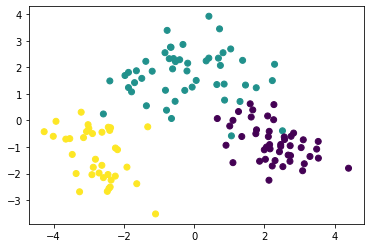

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(xpca[:,0:1],xpca[:,1:2],c=ytrain)
plt.show()

In [ ]:
xpca

array([[-2.36179724, -2.24376386],
       [ 0.72641134,  3.44884089],
       [-1.09601646, -3.51750298],
       [ 2.76328201, -0.595952  ],
       [ 1.86657863, -1.53402461],
       [-2.44973809, -2.03388879],
       [ 2.46825225, -0.90377545],
       [-1.63095317, -2.38049089],
       [ 2.22961169,  1.50083297],
       [ 2.7310655 , -1.53711444],
       [-3.93074852, -0.03117193],
       [ 1.04381746,  2.69254947],
       [-0.81351459,  1.13697224],
       [-1.64142511,  1.8710904 ],
       [ 0.34533162,  2.24248563],
       [-2.89209856, -0.49260332],
       [-0.64232005,  0.07447325],
       [ 0.8695973 ,  0.76634555],
       [-2.86951851, -1.76167732],
       [ 2.11566475, -0.60847895],
       [-2.46978475, -2.66942816],
       [ 1.7712841 ,  1.23260816],
       [ 3.54074849, -1.41821924],
       [-3.35805206, -1.99696003],
       [ 3.53648576, -0.78869775],
       [-3.06164697, -0.41632905],
       [-3.01752921, -0.15711354],
       [-2.38823605, -2.50438974],
       [-2.39780213,

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier(n_neighbors=5)

kmodel.fit(xpca,ytrain)

print(kmodel.score(xpca,ytrain))

0.9624060150375939


In [ ]:
#xtest - 13 features
xtscl = scl.transform(xtest)
xtpca = pca.transform(xtscl)

In [ ]:
print(kmodel.score(xtpca,ytest))

0.9333333333333333
